In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
import datetime
from datetime import date, timedelta
import seaborn as sns
import time
import random
import itertools

from fund_tools import *
from AIP import *

In [2]:
# Set date variable

today = date.today()
first_day_of_the_week = today - timedelta(days=today.weekday())
# end = start + timedelta(days=6)
print("Today: " + str(today))
print("Start: " + str(first_day_of_the_week))
# print("End: " + str(end))

Today: 2021-10-16
Start: 2021-10-11


### Examples for using methods in AIP and fund_tools

In [4]:
start_date = '2015-01-01'
end_date = '2021-10-16'

fund_net_value = get_fund_net_worth('001980',start_date=start_date, end_date=end_date, fund_category='open')
fund_net_value

,净值日期,单位净值,日增长率
0,2018-05-16,1.0000,0.00
1,2018-05-18,1.0002,0.00
2,2018-05-25,1.0003,0.00
3,2018-06-01,0.9999,0.00
4,2018-06-08,1.0008,0.00
...,...,...,...
813,2021-10-11,1.9025,-0.40
814,2021-10-12,1.8719,-1.61
815,2021-10-13,1.8914,1.04
816,2021-10-14,1.8934,0.11


In [5]:
AIP_Weekly('001980', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000, freq='Monday', df=False)

,基金代码,持有天数,定投时间,定投金额,分投期数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
AIP,001980,1209,Monday,1000,159.0,138992.359,1.144,105349.567,0.663,0.166


In [6]:
AIP_direct_df = AIP_Weekly('001980', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000, freq='Monday', AIP=False, df=False)
AIP_direct_df

,基金代码,持有天数,总购买份额,累计收益,累计收益率,年化收益率
DIP,001980,1249,100000.000,90190.000,0.902,0.207


In [7]:
AIP_df = AIP_Weekly('001980', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000, freq='Monday', AIP=True, df=True)
AIP_df

,净值日期,单位净值,日增长率,WeekDay,定投金额(本金),累计定投金额(本金),购买份额,累计份额,平均成本,累计收益,持有天数(定投),年化收益率,累计收益率
0,2018-05-16,1.0000,0.00,Wednesday,0,0,0.000000,0.000000,NaN,NaN,0,NaN,NaN
1,2018-05-18,1.0002,0.00,Friday,0,0,0.000000,0.000000,NaN,NaN,0,NaN,NaN
2,2018-05-25,1.0003,0.00,Friday,0,0,0.000000,0.000000,NaN,NaN,0,NaN,NaN
3,2018-06-01,0.9999,0.00,Friday,0,0,0.000000,0.000000,NaN,NaN,0,NaN,NaN
4,2018-06-08,1.0008,0.00,Friday,0,0,0.000000,0.000000,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,2021-10-11,1.9025,-0.40,Monday,1000,159000,525.624179,138992.358677,1.143948,105432.962384,1205,0.166587,0.663100
814,2021-10-12,1.8719,-1.61,Tuesday,0,159000,0.000000,138992.358677,1.143948,101179.796208,1206,0.160728,0.636351
815,2021-10-13,1.8914,1.04,Wednesday,0,159000,0.000000,138992.358677,1.143948,103890.147203,1207,0.164227,0.653397
816,2021-10-14,1.8934,0.11,Thursday,0,159000,0.000000,138992.358677,1.143948,104168.131920,1208,0.164453,0.655145


In [8]:
Freq = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

AIP_Weekly_Plans(Freq, '001980', start_date, end_date, fund_category='open', fixed_investment=1000, AIP=True, df=False)

,基金代码,持有天数,定投时间,定投金额,分投期数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
AIP,001980,1207,Monday,1000,159.0,138992.359,1.144,103890.147,0.653,0.164
AIP,001980,1213,Tuesday,1000,163.0,141872.700,1.149,105338.024,0.646,0.162
AIP,001980,1247,Wednesday,1000,165.0,143779.314,1.148,106944.195,0.648,0.157
AIP,001980,1218,Thursday,1000,164.0,143136.130,1.146,106727.677,0.651,0.162
AIP,001980,1245,Friday,1000,163.0,142387.848,1.145,106312.376,0.652,0.159


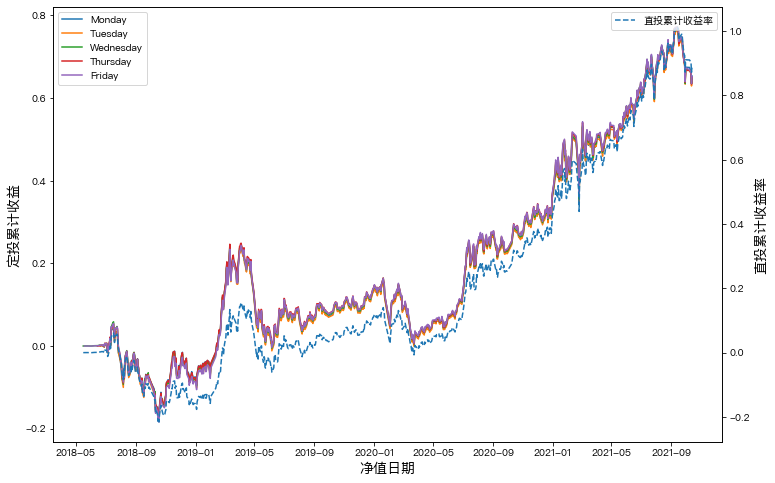

In [9]:
AIP_Weekly_plot('001980', start_date, end_date, 'open')

In [10]:
Max_AIP_Weekly('001980', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000, AIP=True, df=False)

,基金代码,持有天数,触发投资门槛(低买入),触发投资门槛(高卖出),单次金额,买入次数,卖出次数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
Plan,001980,1102,-3.0,2.0,1000,12,11,1368.136,0.731,1587.693,1.588,0.370


In [11]:
Max_AIP_Weekly('001980', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000, AIP=False, df=False)

,基金代码,持有天数,总购买份额,累计收益,累计收益率,年化收益率
DIP,001980,1247,100000.000,89140.000,0.891,0.205


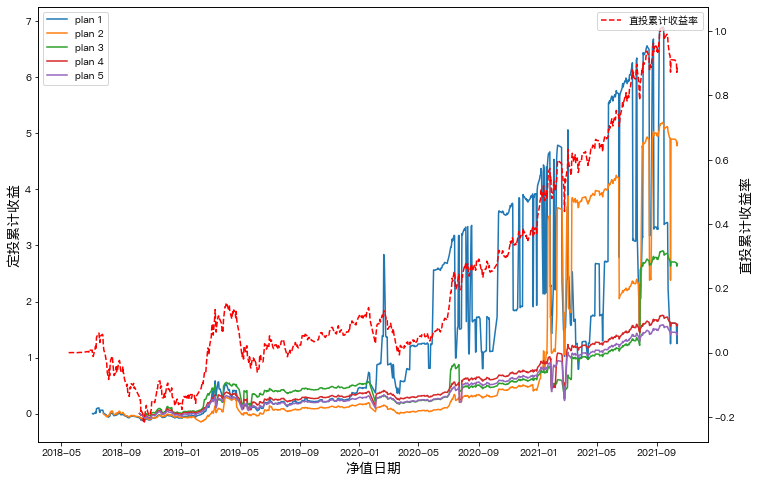

In [12]:
Max_AIP_Weekly_plot('001980', start_date, end_date, 'open')

In [13]:
df = Max_AIP_Weekly('001980', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000, df=True)
df

,净值日期,单位净值,日增长率,WeekDay,定投金额(本金),累计定投金额(本金),购买份额,累计份额,平均成本,累计收益,持有天数,年化收益率,累计收益率
0,2018-05-16,1.0000,0.00,Wednesday,0,0,0.0,0.000000,NaN,NaN,0,NaN,NaN
1,2018-05-18,1.0002,0.00,Friday,0,0,0.0,0.000000,NaN,NaN,0,NaN,NaN
2,2018-05-25,1.0003,0.00,Friday,0,0,0.0,0.000000,NaN,NaN,0,NaN,NaN
3,2018-06-01,0.9999,0.00,Friday,0,0,0.0,0.000000,NaN,NaN,0,NaN,NaN
4,2018-06-08,1.0008,0.00,Friday,0,0,0.0,0.000000,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,2021-09-30,1.9109,2.05,Thursday,0,1000,0.0,1368.136167,0.730921,1614.371401,1089,0.380031,1.614371
812,2021-10-08,1.9102,-0.04,Friday,0,1000,0.0,1368.136167,0.730921,1613.413705,1097,0.376626,1.613414
813,2021-10-11,1.9025,-0.40,Monday,0,1000,0.0,1368.136167,0.730921,1602.879057,1100,0.373584,1.602879
814,2021-10-12,1.8719,-1.61,Tuesday,0,1000,0.0,1368.136167,0.730921,1561.014090,1101,0.365826,1.561014


In [14]:
upper_threshold = [1.0, 2.0, 3.0, 4.0, 5.0]
lower_threshold = [-1.0, -2.0, -3.0, -4.0, -5.0]

Max_AIP_Weekly_Plans('001980', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000, 
                     upper_threshold=upper_threshold, lower_threshold=lower_threshold)

,基金代码,持有天数,触发投资门槛(低买入),触发投资门槛(高卖出),单次金额,买入次数,卖出次数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
Plan,001980,1198,-1.0,1.0,1000,131,127,5477.557,0.730,6360.251,1.590,0.336
Plan,001980,1198,-1.0,2.0,1000,131,51,74064.558,1.080,60085.706,0.751,0.186
Plan,001980,1198,-1.0,3.0,1000,131,20,100638.458,1.103,79347.580,0.715,0.179
Plan,001980,1198,-1.0,4.0,1000,131,4,115623.966,1.098,91691.170,0.722,0.180
Plan,001980,1198,-1.0,5.0,1000,131,2,117589.584,1.097,93408.940,0.724,0.181
Plan,001980,1176,-2.0,1.0,1000,43,42,1250.628,0.800,1365.438,1.365,0.306
Plan,001980,1176,-2.0,2.0,1000,43,42,3086.672,0.324,4838.130,4.838,0.729
Plan,001980,1176,-2.0,3.0,1000,43,19,22250.803,1.079,18085.169,0.754,0.190
Plan,001980,1176,-2.0,4.0,1000,43,4,36281.475,1.075,29622.782,0.760,0.192
Plan,001980,1176,-2.0,5.0,1000,43,2,38247.093,1.072,31340.551,0.764,0.193


In [15]:
StochasticAIP_Weekly('001980', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000, Freq=5, seed=12345, df=True)

,净值日期,单位净值,日增长率,WeekDay,定投金额(本金),累计定投金额(本金),购买份额,累计份额,平均成本,累计收益,持有天数,年化收益率,累计收益率
0,2018-05-16,1.0000,0.00,Wednesday,0,0,0.000000,0.000000,NaN,NaN,0,NaN,NaN
1,2018-05-18,1.0002,0.00,Friday,1000,1000,999.800040,999.800040,1.000200,0.000000,1,0.000000,0.000000
2,2018-05-25,1.0003,0.00,Friday,1000,2000,999.700090,1999.500130,1.000250,0.099980,8,0.002283,0.000050
3,2018-06-01,0.9999,0.00,Friday,1000,3000,1000.100010,2999.600140,1.000133,-0.699820,15,-0.005661,-0.000233
4,2018-06-08,1.0008,0.00,Friday,1000,4000,999.200639,3998.800779,1.000300,1.999820,22,0.008327,0.000500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,2021-09-30,1.9109,2.05,Thursday,1000,171000,523.313622,150310.268187,1.137647,116227.891478,1232,0.166080,0.679695
812,2021-10-08,1.9102,-0.04,Friday,0,171000,0.000000,150310.268187,1.137647,116122.674290,1240,0.164799,0.679080
813,2021-10-11,1.9025,-0.40,Monday,0,171000,0.000000,150310.268187,1.137647,114965.285225,1243,0.162990,0.672312
814,2021-10-12,1.8719,-1.61,Tuesday,0,171000,0.000000,150310.268187,1.137647,110365.791019,1244,0.157329,0.645414


In [16]:
Freq = 5
seed = [1234, 123, 2133, 2314, 435]

StochasticAIP_Weekly_Plans(Freq=Freq, seed=seed, code='001980', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000)

,基金代码,持有天数,定投时间,定投金额,分投期数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
Plan,001980,1247,随机,1000,166.0,145060.929,1.144,108368.241,0.653,0.158
Plan,001980,1245,随机,1000,172.0,150590.582,1.142,112827.027,0.656,0.159
Plan,001980,1245,随机,1000,171.0,150244.310,1.138,113172.088,0.662,0.161
Plan,001980,1245,随机,1000,175.0,153185.508,1.142,114735.069,0.656,0.159
Plan,001980,1245,随机,1000,170.0,149048.781,1.141,111910.865,0.658,0.160


In [17]:
Freq = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

AIP_Weekly_Plans(Freq, '001980', start_date, end_date, fund_category='open', fixed_investment=1000, df=False)

,基金代码,持有天数,定投时间,定投金额,分投期数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
AIP,001980,1207,Monday,1000,159.0,138992.359,1.144,103890.147,0.653,0.164
AIP,001980,1213,Tuesday,1000,163.0,141872.700,1.149,105338.024,0.646,0.162
AIP,001980,1247,Wednesday,1000,165.0,143779.314,1.148,106944.195,0.648,0.157
AIP,001980,1218,Thursday,1000,164.0,143136.130,1.146,106727.677,0.651,0.162
AIP,001980,1245,Friday,1000,163.0,142387.848,1.145,106312.376,0.652,0.159


In [18]:
AIP_Weekly('004854', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000, freq='Monday', df=False)

,基金代码,持有天数,定投时间,定投金额,分投期数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
AIP,004854,1536,Monday,1000,197.0,218818.070,0.900,155362.738,0.789,0.148


In [28]:
Freq=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

AIP_Weekly_Plans(Freq, '009623', start_date, end_date, fund_category='open', fixed_investment=1000, AIP=True, df=False)

,基金代码,持有天数,定投时间,定投金额,分投期数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
AIP,009623,416,Monday,1000,53.0,49458.592,1.072,-44.686,-0.001,-0.001
AIP,009623,478,Tuesday,1000,57.0,53341.611,1.069,112.863,0.002,0.002
AIP,009623,477,Wednesday,1000,57.0,53178.167,1.072,-62.137,-0.001,-0.001
AIP,009623,413,Thursday,1000,55.0,51065.489,1.077,-324.180,-0.006,-0.005
AIP,009623,468,Friday,1000,63.0,59124.641,1.066,304.754,0.005,0.004


In [20]:
Total_df = current_open_fund_mergered()

In [29]:
AIP_Weekly('009623', start_date, end_date, 'open', fixed_investment=1000, freq='Monday', df=False, AIP=False)

,基金代码,持有天数,总购买份额,累计收益,累计收益率,年化收益率
DIP,009623,478,100000.000,7070.000,0.071,0.054


In [30]:
Freq=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

AIP_Weekly_Plans(Freq, '009623', start_date, end_date, fund_category='open', fixed_investment=1000, AIP=True, df=False)

,基金代码,持有天数,定投时间,定投金额,分投期数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
AIP,009623,416,Monday,1000,53.0,49458.592,1.072,-44.686,-0.001,-0.001
AIP,009623,478,Tuesday,1000,57.0,53341.611,1.069,112.863,0.002,0.002
AIP,009623,477,Wednesday,1000,57.0,53178.167,1.072,-62.137,-0.001,-0.001
AIP,009623,413,Thursday,1000,55.0,51065.489,1.077,-324.180,-0.006,-0.005
AIP,009623,468,Friday,1000,63.0,59124.641,1.066,304.754,0.005,0.004


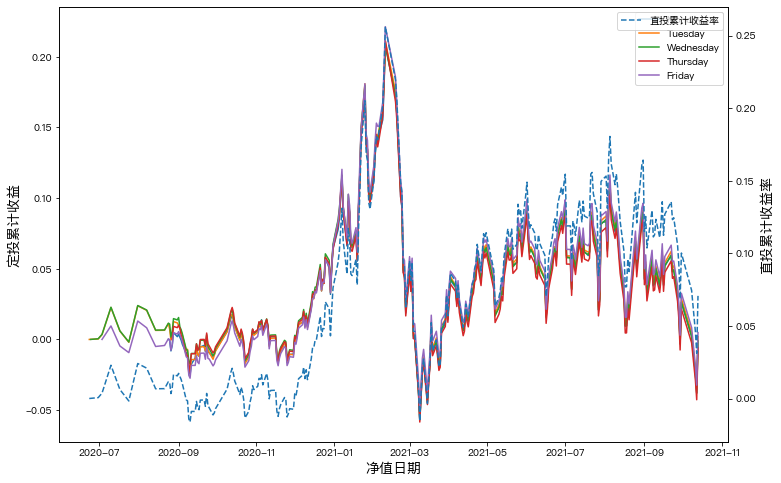

In [31]:
AIP_Weekly_plot('009623', start_date, end_date, 'open')

In [35]:
df = Max_AIP_Weekly('009623', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000, df=False)
df

,基金代码,持有天数,触发投资门槛(低买入),触发投资门槛(高卖出),单次金额,买入次数,卖出次数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
Plan,009623,261,-3.0,2.0,1000,8,7,889.017,1.125,-48.130,-0.048,-0.067


In [34]:
upper_threshold = [1.0, 2.0, 3.0]
lower_threshold = [-1.0, -2.0, -3.0]

Max_AIP_Weekly_Plans('009623', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000, 
                     upper_threshold=upper_threshold, lower_threshold=lower_threshold)

,基金代码,持有天数,触发投资门槛(低买入),触发投资门槛(高卖出),单次金额,买入次数,卖出次数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
Plan,009623,402,-1.0,1.0,1000,62,49,12423.028,1.046,301.336,0.023,0.021
Plan,009623,402,-1.0,2.0,1000,62,22,37868.252,1.056,545.537,0.014,0.012
Plan,009623,402,-1.0,3.0,1000,62,5,52845.113,1.079,-418.737,-0.007,-0.007
Plan,009623,279,-2.0,1.0,1000,25,23,1955.548,1.023,93.805,0.047,0.062
Plan,009623,279,-2.0,2.0,1000,25,19,6197.311,0.968,635.461,0.106,0.141
Plan,009623,279,-2.0,3.0,1000,25,5,18615.350,1.074,-68.545,-0.003,-0.004
Plan,009623,261,-3.0,1.0,1000,8,7,847.769,1.180,-92.294,-0.092,-0.127
Plan,009623,261,-3.0,2.0,1000,8,7,889.017,1.125,-48.130,-0.048,-0.067
Plan,009623,261,-3.0,3.0,1000,8,4,3749.254,1.067,14.326,0.004,0.005


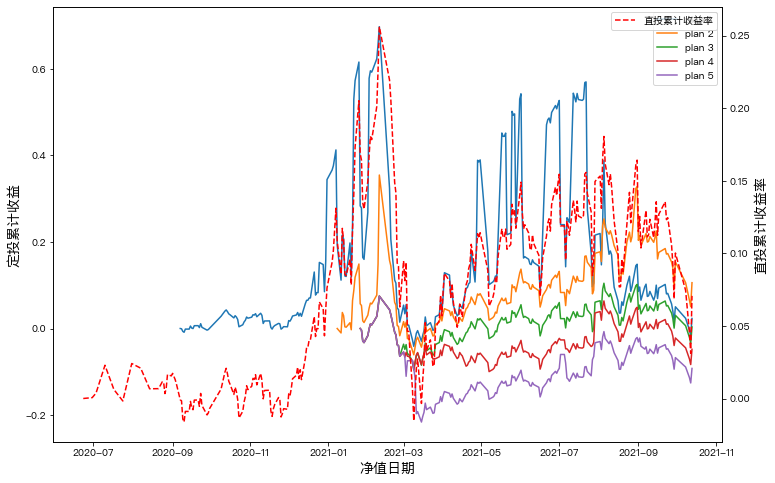

In [36]:
Max_AIP_Weekly_plot('009623', start_date, end_date, 'open')

In [37]:
StochasticAIP_Weekly('009623', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000, Freq=5, seed=12345, df=True, AIP=True)

,净值日期,单位净值,日增长率,WeekDay,定投金额(本金),累计定投金额(本金),购买份额,累计份额,平均成本,累计收益,持有天数,年化收益率,累计收益率
0,2020-06-23,1.0000,0.00,Tuesday,0,0,0.00000,0.000000,NaN,NaN,0,NaN,NaN
1,2020-06-24,1.0001,0.01,Wednesday,0,0,0.00000,0.000000,NaN,NaN,0,NaN,NaN
2,2020-06-30,1.0006,0.00,Tuesday,0,0,0.00000,0.000000,NaN,NaN,0,NaN,NaN
3,2020-07-03,1.0037,0.00,Friday,1000,1000,996.31364,996.313640,1.003700,0.000000,1,0.000000,0.000000
4,2020-07-10,1.0229,0.00,Friday,1000,2000,977.61267,1973.926309,1.013209,19.129222,8,0.543900,0.009565
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2021-09-30,1.1002,2.96,Thursday,0,64000,0.00000,59923.373348,1.068031,1927.695358,455,0.024091,0.030120
281,2021-10-08,1.0745,-2.34,Friday,0,64000,0.00000,59923.373348,1.068031,387.664663,463,0.004772,0.006057
282,2021-10-11,1.0457,-2.68,Monday,0,64000,0.00000,59923.373348,1.068031,-1338.128490,466,-0.016414,-0.020908
283,2021-10-12,1.0311,-1.40,Tuesday,0,64000,0.00000,59923.373348,1.068031,-2213.009741,467,-0.027129,-0.034578


In [38]:
Freq = 5
seed = [1234, 123, 2133, 2314, 435]

StochasticAIP_Weekly_Plans(Freq=Freq, seed=seed, code='009623', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000)

,基金代码,持有天数,定投时间,定投金额,分投期数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
Plan,009623,468,随机,1000,63.0,59010.843,1.068,182.910,0.003,0.002
Plan,009623,468,随机,1000,63.0,59121.006,1.066,300.861,0.005,0.004
Plan,009623,478,随机,1000,64.0,60059.005,1.066,305.176,0.005,0.004
Plan,009623,468,随机,1000,63.0,59158.663,1.065,341.181,0.005,0.004
Plan,009623,477,随机,1000,62.0,58015.862,1.069,117.583,0.002,0.001


In [28]:
Freq=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

AIP_Weekly_Plans(Freq, '011146', start_date, end_date, fund_category='open', fixed_investment=1000, AIP=True, df=False)

,基金代码,持有天数,定投时间,定投金额,分投期数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
AIP,011146,270,Monday,1000,34.0,28684.387,1.185,11843.387,0.348,0.498
AIP,011146,269,Tuesday,1000,36.0,30653.264,1.174,12990.046,0.361,0.519
AIP,011146,275,Wednesday,1000,38.0,32120.753,1.183,13335.387,0.351,0.491
AIP,011146,274,Thursday,1000,39.0,32988.098,1.182,13721.579,0.352,0.494
AIP,011146,266,Friday,1000,37.0,31235.197,1.185,12920.092,0.349,0.508


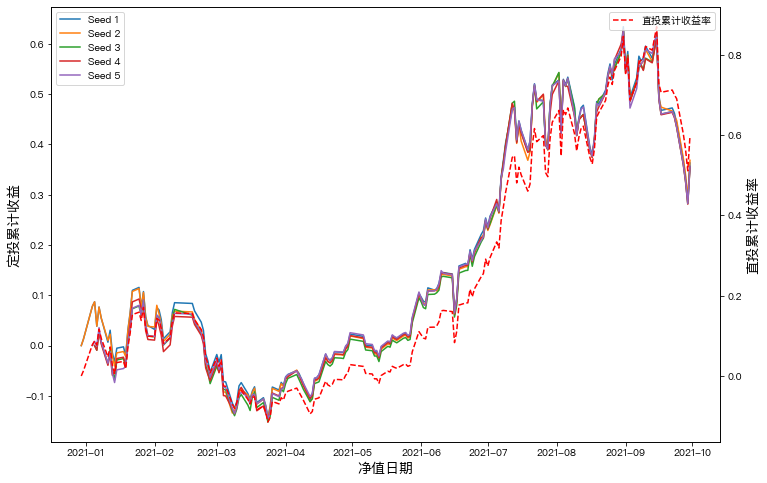

In [29]:
StochasticAIP_Weekly_plot('011146', start_date, end_date, 'open')

### Cross-sectional performance

In [5]:
all_cate_fund = get_category_all_funds()

In [6]:
GPX_fund_code = all_cate_fund['股票型']
QDII_fund_code = all_cate_fund['QDII']
ZQX_fund_code = all_cate_fund['债券型']
SPX_fund_code = all_cate_fund['商品（不含QDII）']
ZSX_fund_code = all_cate_fund['指数型']
HHX_fund_code = all_cate_fund['混合型']

In [8]:
fund_net_value = get_fund_net_worth('501021', start_date, end_date, 'open')
fund_net_value['WeekDay'] = pd.to_datetime(fund_net_value['净值日期']).dt.day_name()

fund_net_value['定投金额(本金)'] = 0.0

for i in range(len(fund_net_value['WeekDay'])):
     if fund_net_value['WeekDay'].values[i] == 'Monday':
            fund_net_value['定投金额(本金)'][i] = 1000
fund_net_value['累计定投金额(本金)'] = fund_net_value['定投金额(本金)'].cumsum()
fund_net_value['购买份额'] = fund_net_value['定投金额(本金)']/fund_net_value['单位净值']
fund_net_value['累计份额'] = fund_net_value['购买份额'].cumsum()
fund_net_value['平均成本'] = fund_net_value['累计定投金额(本金)']/fund_net_value['累计份额']

fund_net_value

,净值日期,单位净值,日增长率,WeekDay,定投金额(本金),累计定投金额(本金),购买份额,累计份额,平均成本
0,2016-06-24,1.0000,0.00,Friday,0.0,0.0,0.000000,0.000000,NaN
1,2016-06-27,1.0000,0.00,Monday,1000.0,1000.0,1000.000000,1000.000000,1.000000
2,2016-06-28,1.0000,0.00,Tuesday,0.0,1000.0,0.000000,1000.000000,1.000000
3,2016-06-29,1.0001,0.01,Wednesday,0.0,1000.0,0.000000,1000.000000,1.000000
4,2016-06-30,1.0001,0.00,Thursday,0.0,1000.0,0.000000,1000.000000,1.000000
...,...,...,...,...,...,...,...,...,...
1285,2021-09-24,1.6937,-1.91,Friday,0.0,250000.0,0.000000,182207.237620,1.372064
1286,2021-09-27,1.6779,-0.93,Monday,1000.0,251000.0,595.983074,182803.220694,1.373061
1287,2021-09-28,1.6979,1.19,Tuesday,0.0,251000.0,0.000000,182803.220694,1.373061
1288,2021-09-29,1.6890,-0.52,Wednesday,0.0,251000.0,0.000000,182803.220694,1.373061


In [78]:
AIP_Weekly('013172', start_date, end_date, 'open', fixed_investment=1000, freq='Thursday', AIP=True, df=False)

,基金代码,持有天数,定投时间,定投金额,分投期数,总购买份额,平均成本,累计收益,累计收益率,年化收益率
AIP,013172,8,Thursday,1000,2.0,2035.454,0.983,-25.814,-0.013,-0.447


In [11]:
HHX_performance = pd.DataFrame()
for code in QDII_fund_code:
    HHX_performance = HHX_performance.append(AIP_Weekly(code, start_date, end_date, 'open', fixed_investment=1000, freq='Monday', AIP=True, df=False)
                                             [['基金代码', '定投时间', '累计收益率', '年化收益率']])
    HHX_performance = HHX_performance.append(AIP_Weekly(code, start_date, end_date, 'open', fixed_investment=1000, freq='Tuesday', AIP=True, df=False)
                                             [['基金代码', '定投时间', '累计收益率', '年化收益率']])
    HHX_performance = HHX_performance.append(AIP_Weekly(code, start_date, end_date, 'open', fixed_investment=1000, freq='Wednesday', AIP=True, df=False)
                                             [['基金代码', '定投时间', '累计收益率', '年化收益率']])
    HHX_performance = HHX_performance.append(AIP_Weekly(code, start_date, end_date, 'open', fixed_investment=1000, freq='Thursday', AIP=True, df=False)
                                             [['基金代码', '定投时间', '累计收益率', '年化收益率']])
    HHX_performance = HHX_performance.append(AIP_Weekly(code, start_date, end_date, 'open', fixed_investment=1000, freq='Friday', AIP=True, df=False)
                                             [['基金代码', '定投时间', '累计收益率', '年化收益率']])
    
HHX_performance

,基金代码,定投时间,累计收益率,年化收益率
AIP,161124,Monday,0.141,0.027
AIP,161124,Tuesday,0.140,0.027
AIP,161124,Wednesday,0.139,0.027
AIP,161124,Thursday,0.141,0.027
AIP,161124,Friday,0.141,0.027
...,...,...,...,...
AIP,013172,Monday,-0.001,-0.107
AIP,013172,Tuesday,-0.025,-0.424
AIP,013172,Wednesday,-0.012,-0.396
AIP,013172,Thursday,-0.013,-0.447


In [14]:
QDII_fund_code

array(['161124', '006263', '501021', '006127', '160922', '008972',
       '000948', '005734', '160924', '000071', '006381', '164705',
       '010789', '005675', '160717', '110031', '161831', '000075',
       '110033', '110032', '012804', '012805', '013171', '013172'],
      dtype=object)

In [61]:
def get_fund_net_worth_df(code_list, minimum_length=125, data='单位净值'):
    
    date_list = []
    for code in code_list:
        date_list.append(ak.fund_em_open_fund_info(fund=code)['净值日期'].values[0])
        date_list.append(ak.fund_em_open_fund_info(fund=code)['净值日期'].values[-1])
        
    df = pd.DataFrame(index=pd.date_range(start=min(date_list), end=max(date_list)))
        
    for code in code_list:
        fund_df = get_fund_net_worth(code, start_date=min(date_list), end_date=end_date, fund_category='open').set_index('净值日期')[data]
        if len(fund_df) >= minimum_length:
            df[code] = fund_df
    return df

In [63]:
df = get_fund_net_worth_df(QDII_fund_code)

In [23]:
code_to_name('161124')

'易方达香港小型股指数A'

In [75]:
AIP_Weekly_Plans(Freq=['Monday','Tueaday','Wednesday','Thursday','Friday'], code='161124', start_date=start_date, end_date=end_date, fund_category='open', fixed_investment=1000)

IndexError: index 0 is out of bounds for axis 0 with size 0